In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.randn(500, 2)
Y = np.zeros((500, 3))
for i in range(500):
    r = np.sqrt(X[i,0]**2 + X[i,1]**2)
    if r < 0.8:
        Y[i,0] = 1
    elif r < 1.6:
        Y[i,1] = 1
    else:
        Y[i,2] = 1

In [8]:
class NeuralNetwork:
    def __init__(self):

        input_neurons = 2
        hidden1_neurons = 10
        hidden2_neurons = 8
        output_neurons = 3

        self.learning_rate = 0.1


        self.W1 = np.random.randn(input_neurons, hidden1_neurons)
        self.W2 = np.random.randn(hidden1_neurons, hidden2_neurons)
        self.W3 = np.random.randn(hidden2_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):

        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)


        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)


        self.z3 = np.dot(self.a2, self.W3)
        self.output = self.sigmoid(self.z3)
        return self.output

    def backPropagation(self, X, Y, output):

        output_error = Y - output
        output_delta = self.learning_rate * output_error * self.sigmoid(output, der=True)

        hidden2_error = np.dot(output_delta, self.W3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.a2, der=True)

        hidden1_error = np.dot(hidden2_delta, self.W2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.a1, der=True)


        self.W3 += np.dot(self.a2.T, output_delta)
        self.W2 += np.dot(self.a1.T, hidden2_delta)
        self.W1 += np.dot(X.T, hidden1_delta)

    def train(self, X, Y, epochs=5000):
        errors = []
        for i in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y, output)
            loss = np.mean(np.square(Y - output))
            errors.append(loss)
            if i % 500 == 0:
                print(f"Epoch {i}: Loss={loss:.4f}")
        return errors

In [10]:
NN = NeuralNetwork()
errors = NN.train(X, Y, epochs=5000)

Epoch 0: Loss=0.4848
Epoch 500: Loss=0.1278
Epoch 1000: Loss=0.1077
Epoch 1500: Loss=0.1029
Epoch 2000: Loss=0.0969
Epoch 2500: Loss=0.0903
Epoch 3000: Loss=0.0703
Epoch 3500: Loss=0.0583
Epoch 4000: Loss=0.0520
Epoch 4500: Loss=0.0480


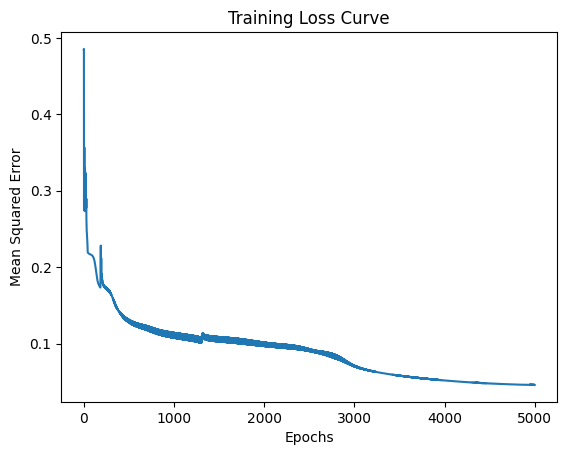

In [9]:
plt.plot(errors)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()